In [1]:
!pip install yfinance pandas matplotlib seaborn requests beautifulsoup4

In [5]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [9]:
!pip install yahooquery


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0


In [11]:
from yahooquery import Ticker

# Criar objeto da Tesla
tesla = Ticker("TSLA")

# Obter dados do demonstrativo de resultados
tesla_income_statement = tesla.income_statement()

# Exibir as colunas disponíveis (para verificar se 'TotalRevenue' está lá)
print(tesla_income_statement.columns)

# Tentar acessar a coluna de receita
try:
    tesla_revenue = tesla_income_statement.loc["annual", "TotalRevenue"]
    print(f"Receita Anual da Tesla: ${tesla_revenue.iloc[-1]:,}")
except KeyError:
    print("❌ Erro: 'TotalRevenue' não encontrado nos dados da Tesla.")


Index(['asOfDate', 'periodType', 'currencyCode', 'AverageDilutionEarnings',
       'BasicAverageShares', 'BasicEPS', 'CostOfRevenue',
       'DilutedAverageShares', 'DilutedEPS', 'DilutedNIAvailtoComStockholders',
       'EBIT', 'EBITDA', 'GrossProfit', 'InterestExpense',
       'InterestExpenseNonOperating', 'InterestIncome',
       'InterestIncomeNonOperating', 'MinorityInterests', 'NetIncome',
       'NetIncomeCommonStockholders', 'NetIncomeContinuousOperations',
       'NetIncomeFromContinuingAndDiscontinuedOperation',
       'NetIncomeFromContinuingOperationNetMinorityInterest',
       'NetIncomeIncludingNoncontrollingInterests', 'NetInterestIncome',
       'NetNonOperatingInterestIncomeExpense', 'NormalizedEBITDA',
       'NormalizedIncome', 'OperatingExpense', 'OperatingIncome',
       'OperatingRevenue', 'OtherIncomeExpense',
       'OtherNonOperatingIncomeExpenses', 'OtherunderPreferredStockDividend',
       'PretaxIncome', 'ReconciledCostOfRevenue', 'ReconciledDepreciation',


In [14]:
!pip install alpha_vantage


In [15]:
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Substitua pela sua API Key
api_key = "SUA_API_KEY_AQUI"

# Criar objeto da API
fd = FundamentalData(api_key, output_format="pandas")

# Obter dados financeiros da Tesla
tesla_income_statement, _ = fd.get_income_statement_annual("TSLA")

# Mostrar as colunas disponíveis
print(tesla_income_statement.columns)

# Extrair receita
tesla_revenue_df = tesla_income_statement[["fiscalDateEnding", "totalRevenue"]]
tesla_revenue_df = tesla_revenue_df.rename(columns={"fiscalDateEnding": "Date", "totalRevenue": "Revenue"})

# Mostrar primeiras linhas
print(tesla_revenue_df.head())


Index(['fiscalDateEnding', 'reportedCurrency', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')
                                     Date      Revenue
date                                                  
1970-01-01 00:00:00.000000000  2024-12-31  97690000000
1970-01-01 00:00:00.000000001  2023-12-31  96773000000
1970-01-01 00:00:00.000000002  2022-12-31  81462000000
1970-01-01 00:00:00.000000003  2021-12-31  53823000000
1970-01-01 00:00:00.00000

In [16]:
# Obter dados financeiros da GameStop
gamestop_income_statement, _ = fd.get_income_statement_annual("GME")

# Extrair receita
gamestop_revenue_df = gamestop_income_statement[["fiscalDateEnding", "totalRevenue"]]
gamestop_revenue_df = gamestop_revenue_df.rename(columns={"fiscalDateEnding": "Date", "Revenue": "Revenue"})

# Mostrar primeiras linhas
print(gamestop_revenue_df.head())


                                     Date totalRevenue
date                                                  
1970-01-01 00:00:00.000000000  2024-02-03   5272800000
1970-01-01 00:00:00.000000001  2023-01-28   5927200000
1970-01-01 00:00:00.000000002  2022-01-29   6010700000
1970-01-01 00:00:00.000000003  2021-01-30   5089800000
1970-01-01 00:00:00.000000004  2020-02-01   6466000000


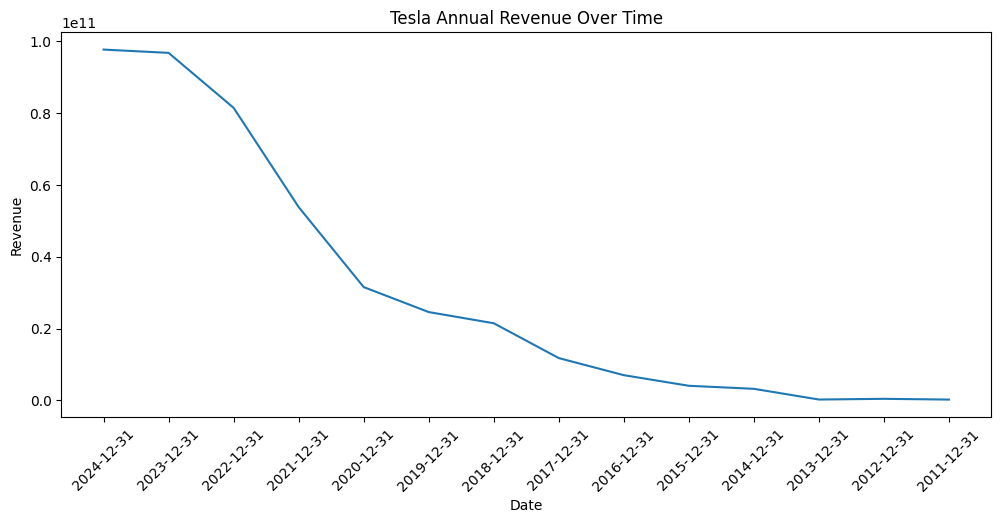

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter receita para número
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"], errors="coerce")

# Criar gráfico
plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y="Revenue", data=tesla_revenue_df)
plt.xticks(rotation=45)
plt.title("Tesla Annual Revenue Over Time")
plt.show()


In [21]:
# Exibir todas as colunas disponíveis no DataFrame
print(gamestop_revenue_df.columns)


Index(['Date', 'totalRevenue'], dtype='object')


In [23]:
print(gamestop_revenue_df.head())


                                     Date  totalRevenue
date                                                   
1970-01-01 00:00:00.000000000  2024-02-03    5272800000
1970-01-01 00:00:00.000000001  2023-01-28    5927200000
1970-01-01 00:00:00.000000002  2022-01-29    6010700000
1970-01-01 00:00:00.000000003  2021-01-30    5089800000
1970-01-01 00:00:00.000000004  2020-02-01    6466000000


In [25]:
# Resetar índice e organizar os dados corretamente
gamestop_revenue_df = gamestop_revenue_df.reset_index()

# Substituir o índice antigo pela coluna de data fiscal correta
gamestop_revenue_df = gamestop_revenue_df.rename(columns={"date": "Old_Index", "fiscalDateEnding": "Date"})

# Remover a coluna de índice antiga
gamestop_revenue_df = gamestop_revenue_df[["Date", "totalRevenue"]]

# Converter receita para número
gamestop_revenue_df["totalRevenue"] = pd.to_numeric(gamestop_revenue_df["totalRevenue"], errors="coerce")

# Mostrar os dados corrigidos
print(gamestop_revenue_df.head())


         Date  totalRevenue
0  2024-02-03    5272800000
1  2023-01-28    5927200000
2  2022-01-29    6010700000
3  2021-01-30    5089800000
4  2020-02-01    6466000000


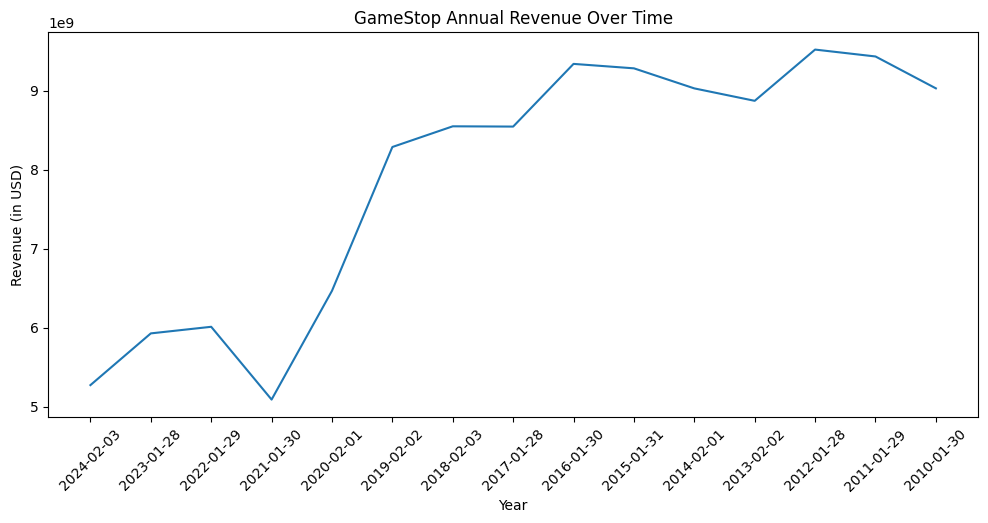

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(x="Date", y="totalRevenue", data=gamestop_revenue_df)
plt.xticks(rotation=45)
plt.title("GameStop Annual Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue (in USD)")
plt.show()
